# Cryptocurrencies - Analysing Historical Data

A cryptocurrency is a digital or virtual currency that uses cryptography for security. They were never intended to be invited to the form we know them today. 
I all started back in 2008 with Satoshi Nakamoto's attempt to create decentrelised peer 2 peer electronic cash system, known as Bitcoin. In 2018, 10 years later, there are more than 1,600 cryptocurrencies available.

In this project we will have a look at Bitcoin, Ethereum, Moneo and Litecoin. Considering historic price, we will find out that the value of cryptocurrencies was decreasing over the last year. Price of cryptocurrencies has a very strong positive correlation. 

We will start with obtaining the data from yahoo finance for the last year. Show some price trends on linegraphs, histograms for closing price values and correlation by using heatmap.

In [1]:
from IPython.display import Image
from IPython.core.display import HTML
Image(url = 'https://video-images.vice.com/articles/5aa9096b499e670006c810b3/lede/1521029731186-cryptocurrencies.jpeg?crop=1xw:0.815625xh;center,center')

### Importing libraries 

In [2]:
# Importing numpy, pandas and Series + DataFrame:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Imports for plotting:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
# Import for datareading:
import pandas_datareader as web
from pandas_datareader import data, wb
import requests
import datetime

### Setting the data 

In [4]:
# Set the date, from today to 1 year ago:
end = datetime.datetime.now()
end_t = end.strftime('%Y-%m-%d')
start = datetime.datetime(end.year - 1,end.month,end.day).strftime('%Y-%m-%d')

In [5]:
# Define the list of cryptocurrencies in USD, bitcoin, litecoin, monero and ethereum:
USD = globals()['USD']= web.DataReader('USD','yahoo', start, end_t)
bitcoin = globals()['BTC-USD'] = web.DataReader('BTC-USD', 'yahoo', start, end_t)
litecoin = globals()['LTC-USD'] = web.DataReader('LTC-USD', 'yahoo', start, end_t)
monero = globals()['XMR-USD'] = web.DataReader('XMR-USD', 'yahoo', start, end_t)
ethereum = globals()['ETH-USD'] = web.DataReader('ETH-USD', 'yahoo', start, end_t)

# Example: BTC-USD as a name for DataFrame would cause us trouble due to '-', so to avoid this issue we can just 
# simply use bitcoin = to create DataFrame

### Visualising Data - Exploratory Data Analysis (EDA)

In [6]:
# To display first five rows of bitcoin dataset:
bitcoin.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-23,11388.519531,9980.500000,10814.519531,10858.230469,1710180828,10858.230469
2018-01-24,11531.599609,10506.549805,10853.780273,11429.019531,1286435482,11429.019531
2018-01-25,11741.919922,10930.339844,11428.110352,11175.870117,1061064251,11175.870117
2018-01-26,11656.540039,10346.860352,11175.870117,11104.200195,1560135332,11104.200195
2018-01-27,11638.690430,10879.200195,11104.339844,11459.709961,1031091633,11459.709961


In [7]:
# How many values do we have and how many are not populated?
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2018-01-23 to 2019-01-23
Data columns (total 6 columns):
High         365 non-null float64
Low          365 non-null float64
Open         365 non-null float64
Close        365 non-null float64
Volume       365 non-null int64
Adj Close    365 non-null float64
dtypes: float64(5), int64(1)
memory usage: 20.0 KB


In [8]:
# To display statistical description of columns with numerical values: 
bitcoin.describe()

,High,Low,Open,Close,Volume,Adj Close
count,365.000000,365.000000,365.000000,365.000000,3.650000e+02,365.000000
mean,7152.217798,6741.881695,6966.214147,6946.305683,6.164326e+08,6946.305683
std,2035.172205,1866.072632,1960.656251,1958.285167,4.668902e+08,1958.285167
min,3271.760010,3169.530029,3232.510010,3232.510010,5.704141e+07,3232.510010
25%,6401.500000,6171.950195,6274.220215,6269.899902,2.898401e+08,6269.899902
50%,6802.029785,6546.979980,6707.459961,6705.029785,4.586877e+08,6705.029785
75%,8432.120117,7889.830078,8216.700195,8216.780273,7.994015e+08,8216.780273
max,12064.190430,11431.549805,11767.740234,11767.740234,3.397597e+09,11767.740234


In one year time, mean price of Bitcoin was 6,946, the highest price reached 11,767 and the price dropped to minimum of 3,232.

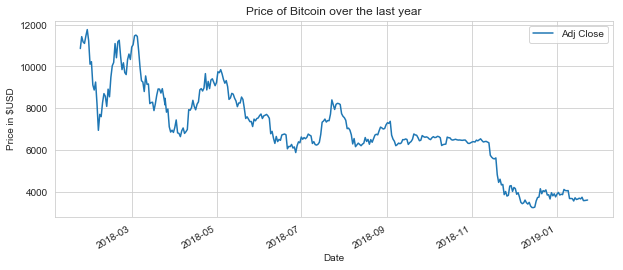

In [9]:
# Plotting the linegraph for price of Bitcoin:
bitcoin['Adj Close'].plot(legend = True, figsize = (10,4))

plt.title('Price of Bitcoin over the last year')
plt.ylabel('Price in $USD')
plt.show()

We can see that there is a decreasing price tendency. The price reached a year minimum in December 2018 and maximum in January 2018.

In [10]:
# Moving average for 10, 20 and 50 days:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = 'MA for %s days' %(str(ma))
    
    bitcoin[column_name] = bitcoin['Adj Close'].rolling(window=ma).mean() 

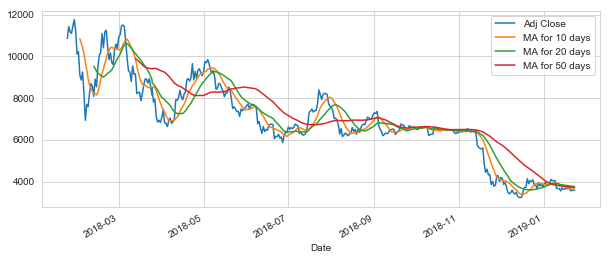

In [11]:
# Plots historical closing price, and moving averages of closing price for 10, 20, 50 days:
bitcoin[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots = False, figsize = (10,4))

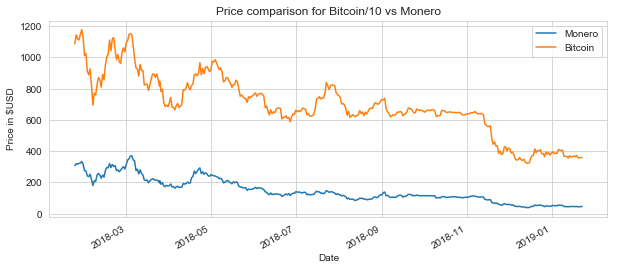

In [12]:
# Comparing price over the year for Bitcoin and Monero (price of Bitcoin is devided by 10 for better visualisation):
btc = bitcoin['Adj Close']/10
monero['Adj Close'].plot(legend = True, label = 'Monero', figsize = (10,4))
btc.plot(legend = True, label = 'Bitcoin', figsize = (10,4))

plt.title('Price comparison for Bitcoin/10 vs Monero')
plt.ylabel('Price in $USD')
plt.show()

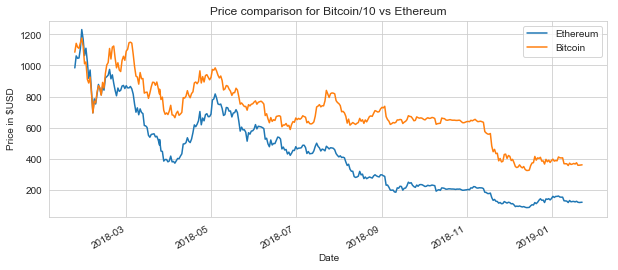

In [13]:
# Comparing price over the year for Bitcoin and Ethereum:
btc = bitcoin['Adj Close']/10
ethereum['Adj Close'].plot(legend = True, label = 'Ethereum', figsize = (10,4))
btc.plot(legend = True, label = 'Bitcoin', figsize = (10,4))

plt.title('Price comparison for Bitcoin/10 vs Ethereum')
plt.ylabel('Price in $USD')
plt.show()

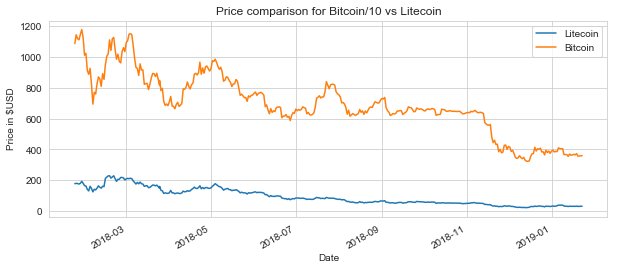

In [14]:
# Comparing price over the year for Bitcoin and Litecoin:

btc = bitcoin['Adj Close']/10
litecoin['Adj Close'].plot(legend = True, label = 'Litecoin', figsize = (10,4))
btc.plot(legend = True, label = 'Bitcoin', figsize = (10,4))

plt.title('Price comparison for Bitcoin/10 vs Litecoin')
plt.ylabel('Price in $USD')
plt.show()

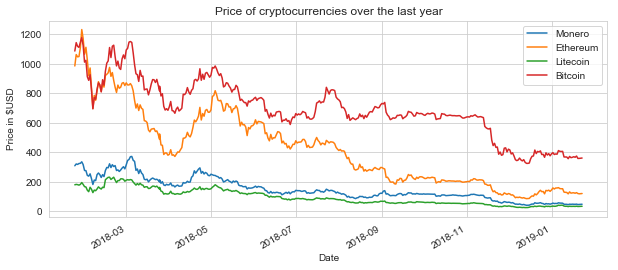

In [15]:
# Comparing price over the year for all selected cryptocurrencies:

monero['Adj Close'].plot(legend = True, label = 'Monero', figsize = (10,4))
ethereum['Adj Close'].plot(legend = True, label = 'Ethereum', figsize = (10,4))
litecoin['Adj Close'].plot(legend = True, label = 'Litecoin', figsize = (10,4))
btc.plot(legend = True, label = 'Bitcoin', figsize = (10,4))

plt.title('Price of cryptocurrencies over the last year')
plt.ylabel('Price in $USD')
plt.show()

In [16]:
# Create a DataFrame, that contains closing prices of all our cryptocurrencies: 
cryptocurrencies = ['BTC-USD', 'LTC-USD', 'XMR-USD', 'ETH-USD']

closing_df = web.DataReader(cryptocurrencies, 'yahoo', start, end_t)['Adj Close']

In [17]:
closing_df.head()

Symbols,BTC-USD,ETH-USD,LTC-USD,XMR-USD
Date,,,,
2018-01-23,10858.230469,984.469971,177.919998,307.089996
2018-01-24,11429.019531,1061.780029,180.589996,319.329987
2018-01-25,11175.870117,1046.369995,178.970001,316.250000
2018-01-26,11104.200195,1048.579956,175.649994,322.540009
2018-01-27,11459.709961,1109.079956,180.710007,323.529999


In [19]:
# For easier manipulation, rename columns to:
closing_df.columns = ['Bitcoin', 'Ethereum', 'Litecoin', 'Monero']

In [20]:
closing_df.head()

,Bitcoin,Ethereum,Litecoin,Monero
Date,,,,
2018-01-23,10858.230469,984.469971,177.919998,307.089996
2018-01-24,11429.019531,1061.780029,180.589996,319.329987
2018-01-25,11175.870117,1046.369995,178.970001,316.250000
2018-01-26,11104.200195,1048.579956,175.649994,322.540009
2018-01-27,11459.709961,1109.079956,180.710007,323.529999


In [21]:
crypto_rets = closing_df.pct_change()
crypto_rets.head()

,Bitcoin,Ethereum,Litecoin,Monero
Date,,,,
2018-01-23,NaN,NaN,NaN,NaN
2018-01-24,0.052567,0.078530,0.015007,0.039858
2018-01-25,-0.022150,-0.014513,-0.008971,-0.009645
2018-01-26,-0.006413,0.002112,-0.018551,0.019889
2018-01-27,0.032016,0.057697,0.028807,0.003069


##### Histograms 

Histograms give us an overview of closing price distribution for a given cryptocurrency.

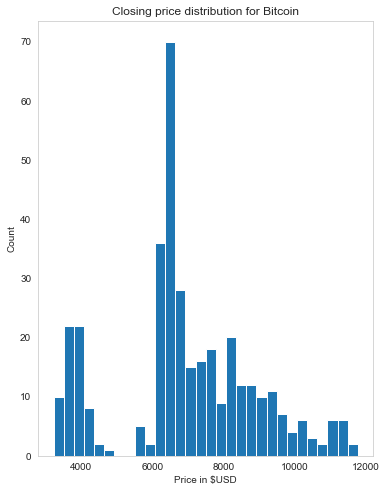

In [22]:
# Distribution of closing price value for Bitcoin:

closing_df['Bitcoin'].hist(bins=30, figsize = (6,8), grid = False)

plt.title('Closing price distribution for Bitcoin')
plt.ylabel ('Count')
plt.xlabel('Price in $USD')

plt.show()

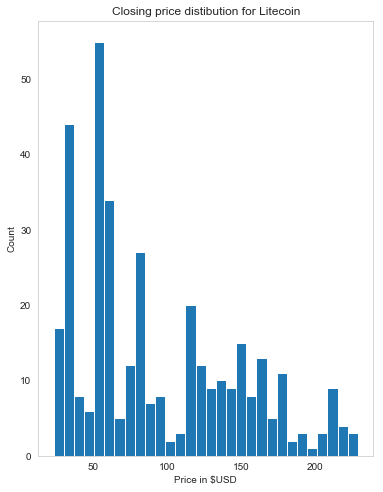

In [23]:
# Distribution of closing price value for Litecoin:

closing_df['Litecoin'].hist(bins=30, figsize = (6,8), grid = False)

plt.title('Closing price distibution for Litecoin')
plt.ylabel ('Count')
plt.xlabel('Price in $USD')

plt.show()

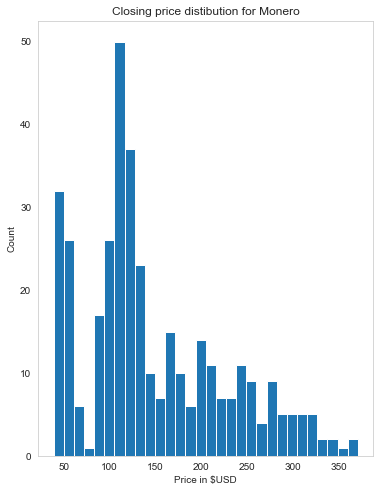

In [24]:
# Distribution of closing price value for Monero:

closing_df['Monero'].hist(bins=30, figsize = (6,8), grid = False)

plt.title('Closing price distibution for Monero')
plt.ylabel ('Count')
plt.xlabel('Price in $USD')

plt.show()

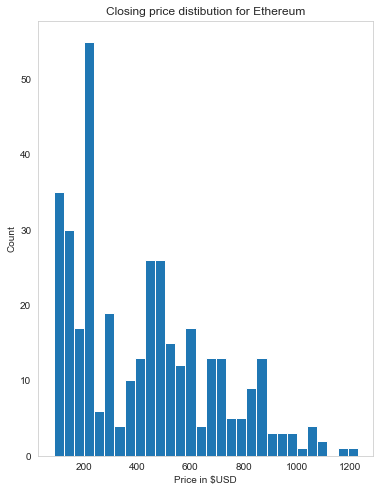

In [25]:
# Distribution of closing price value for Ethereum:

closing_df['Ethereum'].hist(bins=30, figsize = (6,8), grid = False)

plt.title('Closing price distibution for Ethereum')
plt.ylabel ('Count')
plt.xlabel('Price in $USD')

plt.show()

##### Correlation

In [26]:
# Correlation Matrix
sns.set(style="white")
corr = closing_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

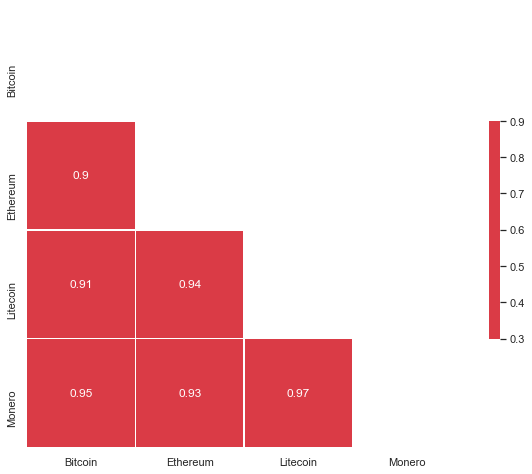

In [27]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .5})

As we can see above, the correlation for selected cryptocurrenies is strong positive, reaching over 0.9 in all cases. This means that the price of cryptocurrencies has a strong tendency to move the same way (increasing or decreasing).

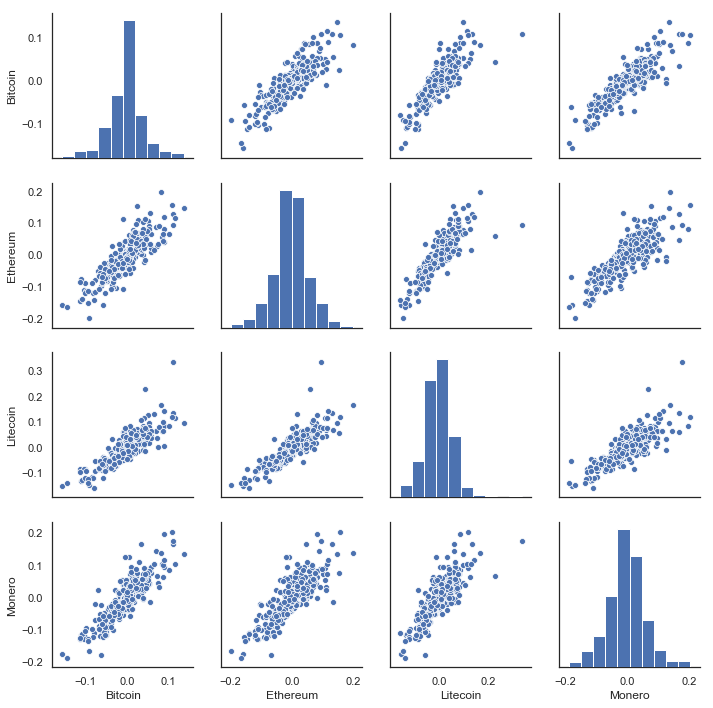

In [28]:
# We can call pairplot to get visual analysis for all cryptocurrencies in our DataFrame:
sns.pairplot(crypto_rets.dropna())

Scatterplots just confirm a strong positive correlation between our cryptocurrenices.